In [2]:
# EOmaps example 7: Using geopandas - interactive shapes!
%matplotlib widget
from eomaps import Maps, MapsGrid
import pandas as pd
import numpy as np
import geopandas as gpd # geopandas is used internally... the import is just here to show that!

D:\python_modules\eomaps\eomaps\eomaps.py:461: UserWarning: EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') when using the 'ipympl' backend to avoid recursions during callbacks!
  "EOmaps disables matplotlib's interactive mode (e.g. 'plt.ioff()') "


EOmaps: Parameter was set to: 'data'
EOmaps: Parameter was set to: 'data'


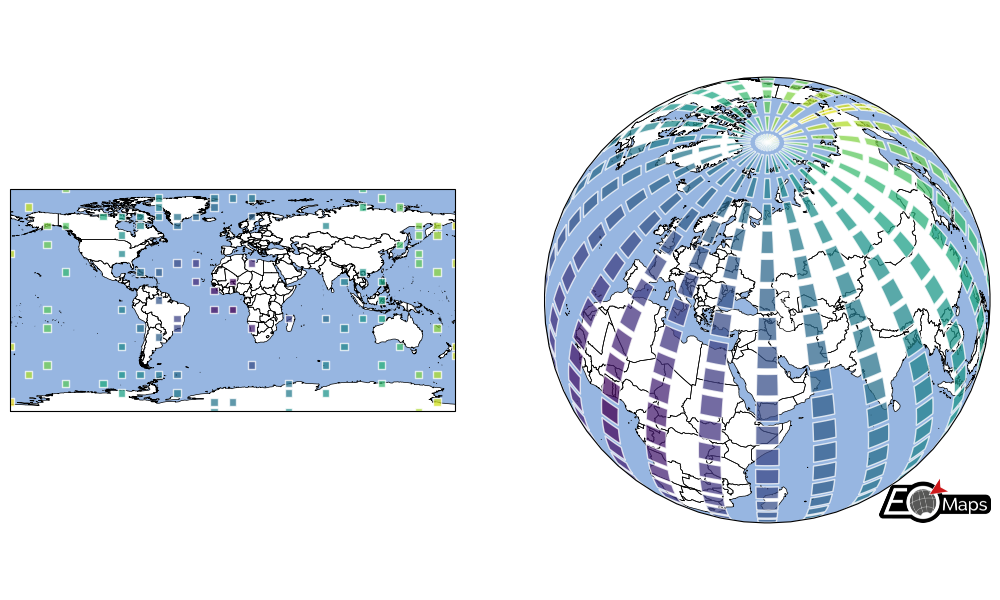

In [3]:
# While this example focusses on "m.add_feature", it works completely similar
# with a custom GeoDataFrame by replacing "m.add_feature..." with "m.add_gdf()"
# (the functionalities and arguments are completely similar)

# ----------- create some example-data
lon, lat = np.meshgrid(np.linspace(-180, 180, 25), np.linspace(-90, 90, 25))
data = pd.DataFrame(
    dict(lon=lon.flat, lat=lat.flat, data=np.sqrt(lon**2 + lat**2).flat)
)

# ----------- setup some maps objects and assign datasets and the plot-crs
mg = MapsGrid(1, 2, crs=[4326, Maps.CRS.Orthographic(45, 45)], figsize=(10, 6))
mg.m_0_0.set_data(data=data.sample(100), xcoord="lon", ycoord="lat", crs=4326)

mg.m_0_1.set_data(data=data, xcoord="lon", ycoord="lat", crs=4326)

mg.add_feature.preset.ocean(reproject="cartopy")

mg.add_feature.cultural_50m.admin_0_countries(
    picker_name="countries",
    pick_method="contains",
    val_key="NAME",
    fc="none",
    ec="k",
    lw=0.5,
)

mg.set_shape.rectangles(radius=3, radius_crs=4326)
mg.plot_map(alpha=0.75, ec=(1, 1, 1, 0.5), pick_distance=25)

for m in mg:
    # attach a callback to highlite the rectangles
    m.cb.pick.attach.mark(
        permanent=False, shape="rectangles", fc="none", ec="b", lw=2, zorder=5
    )

    # attach a callback to highlite the countries and indicate the names
    m.cb.pick["countries"].attach.highlight_geometry(fc="r", ec="k", lw=0.5)
    m.cb.pick["countries"].attach.annotate(text=lambda val, **kwargs: str(val))


mg.share_pick_events()  # share default pick events
mg.share_pick_events("countries")  # share the events of the "countries" picker
mg.m_0_1.add_logo(size=0.25, pad=0)